In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!ls data

GrafoLima_edges.csv	 GrafoLima_nodes.zip	     wazeresults_police.csv
GrafoLima_edgeswaze.csv  wazeresults_bank.csv	     wazeresults_school.csv
GrafoLima_edgeswaze.zip  wazeresults_courthouse.csv  wazeresults_university.csv
GrafoLima_nodes.csv	 wazeresults_hospital.csv


In [18]:
%%time
amenities = ['school', 'university', 'bank', 'courthouse', 'hospital', 'police']
def readamenity(amenity):
    df = pd.read_csv(f"data/wazeresults_{amenity}.csv", sep=';',)
    df['amenity'] = amenity
    return df
    
amenities_data = [readamenity(var) for var in amenities]

CPU times: user 1.14 s, sys: 50.9 ms, total: 1.19 s
Wall time: 1.19 s


In [19]:
data = pd.concat(amenities_data, ignore_index=True)
data

,source,target,wazeinfo1400_km,wazeinfo0800_minutes,wazeinfo1400_minutes,wazeinfo0800_km,amenity
0,1746796546,1273938389,0.391,0.783333,0.800000,0.391,school
1,1746796546,5380596981,0.194,0.400000,0.400000,0.194,school
2,1746796546,1577952874,0.551,1.083333,1.100000,0.551,school
3,1746796546,1746791596,0.257,0.516667,0.516667,0.257,school
4,1746796546,1746791610,0.418,0.833333,0.833333,0.418,school
...,...,...,...,...,...,...,...
642672,416645112,5491555259,0.974,2.183333,2.633333,0.974,police
642673,416645112,791160270,0.744,1.700000,1.700000,0.744,police
642674,416645112,819211251,1.249,3.016667,2.683333,1.249,police
642675,859799546,859799546,0.000,0.000000,0.000000,0.000,police


In [20]:
data.query("amenity == 'courthouse' and wazeinfo1400_km > 0")

,source,target,wazeinfo1400_km,wazeinfo0800_minutes,wazeinfo1400_minutes,wazeinfo0800_km,amenity
559508,4335599630,259996518,0.514,1.383333,1.350000,0.514,courthouse
559509,1674117145,4519916254,0.010,0.016667,0.016667,0.010,courthouse
559510,1674117147,4519916254,0.010,0.016667,0.016667,0.010,courthouse
559511,1674117149,4519916254,0.010,0.016667,0.016667,0.010,courthouse
559512,1951268989,4315098988,2.067,4.633333,4.716667,2.067,courthouse
...,...,...,...,...,...,...,...
568732,416645112,885797822,1.904,5.516667,5.550000,1.904,courthouse
568733,416645112,257946702,4.075,11.566667,10.783333,4.074,courthouse
568734,416645112,108154712,5.108,14.350000,17.000000,5.107,courthouse
568735,416645112,888357854,4.059,11.566667,10.783333,4.058,courthouse


In [21]:
data.isna().sum()

source                  0
target                  0
wazeinfo1400_km         0
wazeinfo0800_minutes    0
wazeinfo1400_minutes    0
wazeinfo0800_km         0
amenity                 0
dtype: int64

In [22]:
%%time
datamin_list = []
for column in ['wazeinfo0800_km', 'wazeinfo1400_minutes','wazeinfo1400_km', 'wazeinfo0800_minutes']:
    
#     column = 'wazeinfo0800_km'
    grouped = data.groupby(['source', 'amenity'])
    min_indices = grouped[column].idxmin()
#     min_rows = data.loc[min_indices.dropna()]
    min_rows = data.loc[min_indices]

    columns = ['source', 'amenity', column ]
    datamin_list.append(min_rows[columns].set_index('source'))

CPU times: user 21.4 s, sys: 549 ms, total: 22 s
Wall time: 21.6 s


In [23]:
datamin = pd.concat(datamin_list, axis=1)
datamin = datamin.loc[:,~datamin.columns.duplicated()]
datamin

,amenity,wazeinfo0800_km,wazeinfo1400_minutes,wazeinfo1400_km,wazeinfo0800_minutes
source,,,,,
31035113,bank,0.185,0.316667,0.185,0.316667
31035113,courthouse,0.058,0.100000,0.058,0.100000
31035113,hospital,0.001,0.000000,0.001,0.000000
31035113,police,0.227,1.583333,0.227,0.716667
31035113,school,0.001,0.000000,0.001,0.000000
...,...,...,...,...,...
9829538620,school,0.007,0.000000,0.007,0.000000
9834894388,school,0.467,0.466667,0.467,0.483333
9834909423,school,0.000,0.000000,0.000,0.000000


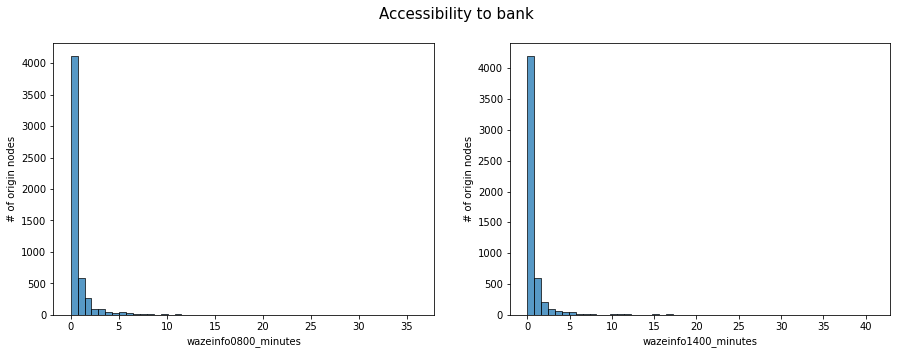

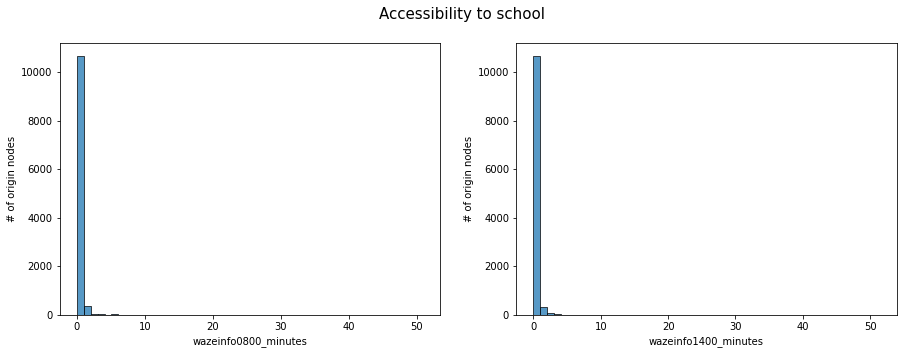

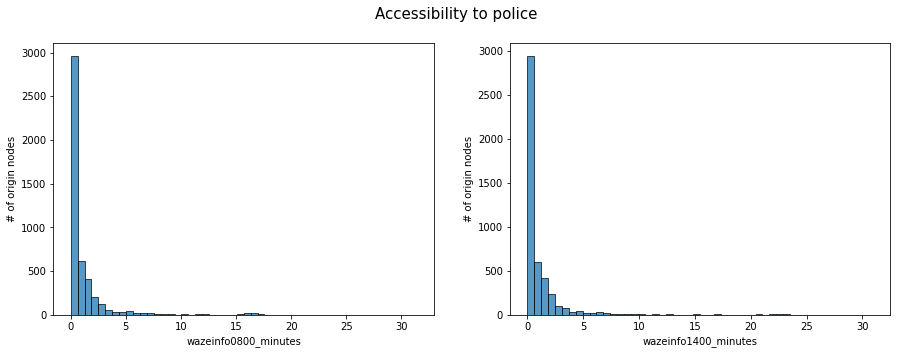

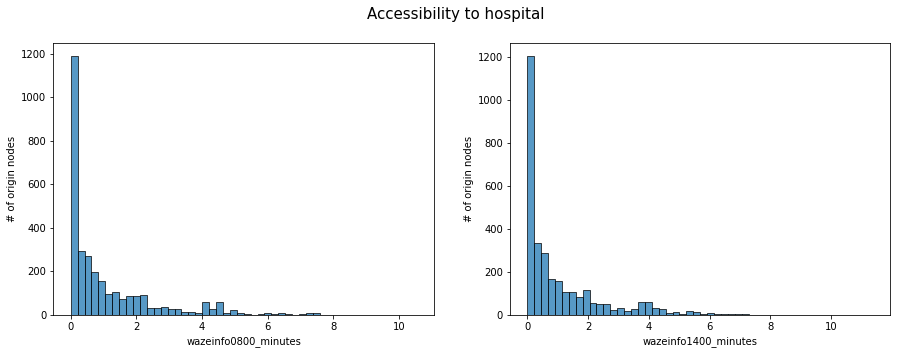

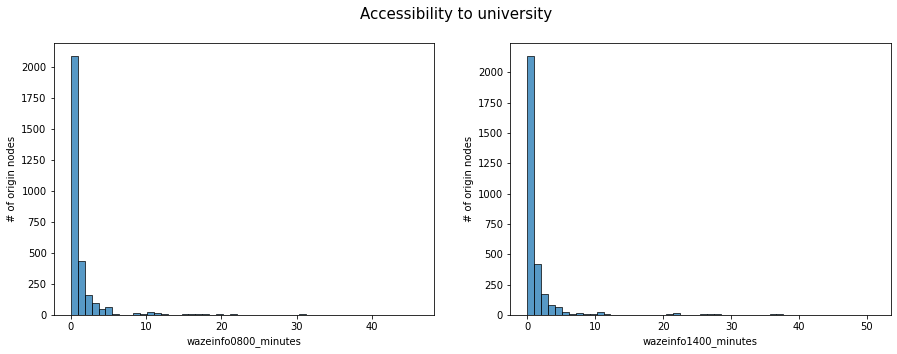

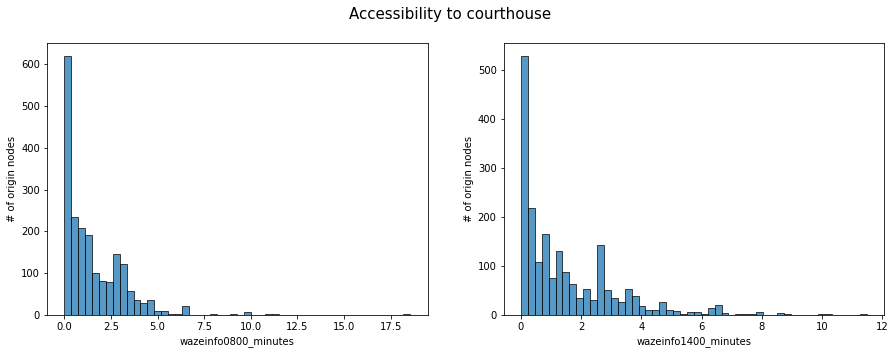

In [24]:
for amenity in ['bank', 'school', 'police', 'hospital', 'university', 'courthouse']:

    fig, axes = plt.subplots(1,2, figsize=(15,5))
#     amenity = 'university'
    df = datamin.query("amenity == @amenity")

    sns.histplot(data=df, x='wazeinfo0800_minutes', ax=axes[0], bins=50)
    sns.histplot(data=df, x='wazeinfo1400_minutes', ax=axes[1], bins=50)

    axes[0].set_ylabel("# of origin nodes")
    axes[1].set_ylabel("# of origin nodes")
    # axes[1].set_title()

    fig.suptitle(f'Accessibility to {amenity} ', fontsize=15)
    plt.show()
    fig.savefig(f"img/accessibility_minutes_{amenity}.png")